Okay so Projection approach is a bust because of noise. My attempt at pure FM. We need to get 100 bits a second at least. Okay so $\delta \leq 0.01 s$. 

This notebook is only for converting .txt file into binary and then creating FM waves to send. I'll do pyAudio in .py files. 

In [1]:
ord('0') # ord() returns the Unicode number of a character

48

In [2]:
### Import text from a .txt file and store it as a string 
filename = "test.txt"
contents = ""
with open(filename, "r") as f:
    contents = f.read()

print(contents)

Hello abcdefghijklmnopqrstuvwxyz



In [3]:
### Convert contents to binary string bin_contents 
# Doesn't pad bit strings so they're of different lenghts - that's why I'm separating with spaces
bin_contents = " ".join(format(ord(c), 'b') for c in contents) 
print(bin_contents)

1001000 1100101 1101100 1101100 1101111 100000 1100001 1100010 1100011 1100100 1100101 1100110 1100111 1101000 1101001 1101010 1101011 1101100 1101101 1101110 1101111 1110000 1110001 1110010 1110011 1110100 1110101 1110110 1110111 1111000 1111001 1111010 1010


In [4]:
### Frequency encodings in Hz
low_freq = 1000 
high_freq = 11907 # Chose something that's coprime with low_freq

In [5]:
bin_contents[0] == '1'

True

In [6]:
import sounddevice as sd

In [7]:
import numpy as np
#####################################################################################################################

### Import text from a .txt file and store it as a string 
filename = "test.txt"
contents = ""
with open(filename, "r") as f:
    contents = f.read()

### Convert contents to binary string bin_contents 
# Doesn't pad bit strings so they're of different lenghts - that's why I'm separating with spaces
bin_contents = "".join(format(ord(c), '08b') for c in contents) #08b means 0 pad and 8 length

### Frequency encodings in Hz
low_freq = 1000
high_freq = 11907 # Chose something that's coprime with low_freq

#####################################################################################################################

fs = 44100 # Usually 44100 or 48000 fps 
t = 0.1
wave = []

for b in bin_contents:
    if b == '0':
        freq = low_freq 
    elif b == '1':
        freq = high_freq 
    else:
        print(b)
    
    # wave.append((np.sin(2 * np.pi * freq * np.arange(t * fs) / fs))[:])
    wave = np.append(wave, [128*np.sin(2 * np.pi * freq * np.arange(t * fs) / fs)])

In [8]:
print(wave)

[  0.         126.99068177 -31.83230556 ... -53.05999062 -35.98222251
 -18.1752727 ]


In [9]:
sd.query_devices()

   0 HDA Intel PCH: ALC3246 Analog (hw:0,0), ALSA (0 in, 2 out)
   1 HDA Intel PCH: HDMI 0 (hw:0,3), ALSA (0 in, 8 out)
   2 HDA Intel PCH: HDMI 1 (hw:0,7), ALSA (0 in, 8 out)
   3 HDA Intel PCH: HDMI 2 (hw:0,8), ALSA (0 in, 8 out)
   4 HDA Intel PCH: HDMI 3 (hw:0,9), ALSA (0 in, 8 out)
   5 HDA Intel PCH: HDMI 4 (hw:0,10), ALSA (0 in, 8 out)
   6 sysdefault, ALSA (0 in, 128 out)
   7 front, ALSA (0 in, 2 out)
   8 surround40, ALSA (0 in, 2 out)
   9 surround51, ALSA (0 in, 2 out)
  10 surround71, ALSA (0 in, 2 out)
  11 hdmi, ALSA (0 in, 8 out)
< 12 default, ALSA (0 in, 128 out)
  13 dmix, ALSA (0 in, 2 out)

In [10]:
sd.get_portaudio_version()

(1246720,
 'PortAudio V19.6.0-devel, revision 396fe4b6699ae929d3a685b3ef8a7e97396139a4')

In [24]:
format(ord('c'), '08b')

'01100011'

In [1]:
import numpy as np
import sounddevice as sd
from scipy.io.wavfile import write 

fs = 44100 # Usually 44100 or 48000 fps 

duration = 10  # seconds

sd.query_devices()

   0 HDA Intel PCH: ALC3246 Analog (hw:0,0), ALSA (2 in, 2 out)
   1 HDA Intel PCH: HDMI 0 (hw:0,3), ALSA (0 in, 8 out)
   2 HDA Intel PCH: HDMI 1 (hw:0,7), ALSA (0 in, 8 out)
   3 HDA Intel PCH: HDMI 2 (hw:0,8), ALSA (0 in, 8 out)
   4 HDA Intel PCH: HDMI 3 (hw:0,9), ALSA (0 in, 8 out)
   5 HDA Intel PCH: HDMI 4 (hw:0,10), ALSA (0 in, 8 out)
   6 sysdefault, ALSA (128 in, 128 out)
   7 front, ALSA (0 in, 2 out)
   8 surround40, ALSA (0 in, 2 out)
   9 surround51, ALSA (0 in, 2 out)
  10 surround71, ALSA (0 in, 2 out)
  11 hdmi, ALSA (0 in, 8 out)
* 12 default, ALSA (128 in, 128 out)
  13 dmix, ALSA (0 in, 2 out)

In [26]:
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=2)
sd.wait()
sd.stop()

print(np.shape(myrecording))

print('Done recording')

PortAudioError: Error querying device -1

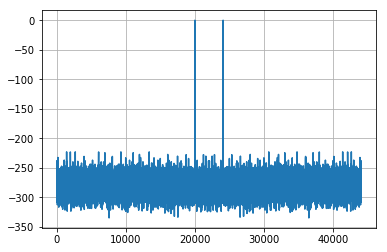

In [13]:
import numpy as np
import matplotlib.pyplot as plt

T = 10  # Duration in seconds
f0 = 20000  # Fundamental frequency
Fs = 44100  # Sampling frequency

# Time domain (signal)
t = np.arange(0, T*Fs)/Fs
x = np.sin(2*np.pi*f0*t)
N = x.size

# DFT
X = np.fft.fft(x)
X_db = 20*np.log10(2*np.abs(X)/N)
#f = np.fft.fftfreq(N, 1/Fs)
f = np.arange(0, N)*Fs/N
test = np.fft.fftfreq(N, 1/float(Fs))

plt.plot(f, X_db)
plt.grid()
plt.show()